<a href="https://colab.research.google.com/github/lishaaaaa/Do-Weekends-Drive-Higher-Sales-A-Data-Analysis-of-Q4-2022/blob/main/Do_Weekends_Drive_Higher_Sales%3F_A_Data_Analysis_of_Q4_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## `Pastikan klik 'File > Save a copy in Drive' sebelum memulai pengerjaan`

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

#Dataset

Data yang digunakan adalah data yang berasal dari Tokopedia (***bukan data sesungguhnya***). Mengenai penjelasan dataset adalah sebagai berikut:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
**order_detail:**
id 			|object| angka unik dari order / id_order
customer_id 		|object|angka unik dari pelanggan
order_date 		|object| tanggal saat dilakukan transaksi
sku_id 			|object| angka unik dari produk (sku adalah stock keeping unit)
price			|int64| harga yang tertera pada tagging harga
qty_ordered 		|int64| jumlah barang yang dibeli oleh pelanggan
before_discount	|float64| nilai harga total dari produk (price * qty_ordered)
discount_amount	|float64| nilai diskon product total
after_discount		|float64| nilai harga total produk ketika sudah dikurangi dengan diskon
is_gross 		|int64| menunjukkan pelanggan belum membayar pesanan
is_valid		|int64| menunjukkan pelanggan sudah melakukan pembayaran
is_net			|int64| menunjukkan transaksi sudah selesai
payment_id 		|int64| angka unik dari metode pembayaran
||
**sku_detail:**
id |object| angka unik dari produk (dapat digunakan untuk key saat join)
sku_name 		|object| nama dari produk
base_price		|float64| harga barang yang tertera pada tagging harga / price
cogs 			|int64| cost of goods sold / total biaya untuk menjual 1 produk
category		|object| kategori produk
||
**customer_detail:**
id 			|object| angka unik dari pelanggan
registered_date	|object| tanggal pelanggan mulai mendaftarkan diri sebagai anggota
||
**payment_detail:**
id			|int64| angka unik dari metode pembayaran
payment_method	|object| metode pembayaran yang digunakan


In [157]:
#Sumber data yang digunakan
path_od = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/sku_detail.csv"
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

In [158]:
#Mengampilkan 5 baris pertama
df_od.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4


In [159]:
#Mengampilkan 5 baris pertama
df_pd.head()

,id,payment_method
0,1,cod
1,2,jazzvoucher
2,3,customercredit
3,4,Payaxis
4,5,jazzwallet


In [160]:
#Mengampilkan 5 baris pertama
df_cd.head()

,id,registered_date
0,C996508L,2021-07-10
1,C180415L,2021-07-18
2,C535451L,2021-07-23
3,C177843L,2021-07-12
4,C951682L,2021-07-27


In [161]:
#Mengampilkan 5 baris pertama
df_sd.head()

,id,sku_name,base_price,cogs,category
0,P798444,AT-FSM-35,57631.70,46052,Kids & Baby
1,P938347,AYS_Haier-18HNF,3931789.26,3499256,Appliances
2,P826364,Atalian _DV206A-Brown-41,324597.00,243426,Men Fashion
3,P467533,Darul_Sakoon_Food_Bundle,2870.42,2378,Superstore
4,P229955,HP_15AY-15-Ay072NIA-ci3,2265625.00,1631250,Computing


In [162]:
#Menjalankan SQL di Colab
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

3998

In [163]:
#Query SQL untuk menggabungkan data
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [164]:
#Mengampilkan 5 baris pertama
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942.0,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680.0,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances,2021-07-05


In [165]:
#Menampikan tipe data tiap kolom
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,float64
discount_amount,float64
after_discount,float64
is_gross,int64


In [166]:
#Mengubah tipe data agar mudah dilakukan pengolahan data
df = df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int',"base_price":'int'})
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


In [167]:
#Mengubah tipe kolom Date menjadi Datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes


,0
id,object
customer_id,object
order_date,datetime64[ns]
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


## `No 1`
**Dear Data Analyst**,
<br></br>
Akhir tahun ini, perusahaan akan memberikan hadiah bagi pelanggan yang memenangkan kompetisi **Festival Akhir Tahun**. Tim Marketing membutuhkan bantuan untuk menentukan perkiraan hadiah yang akan diberikan pada pemenang kompetisi nantinya. Hadiah tersebut akan diambil dari **TOP 5 Produk** dari Kategori **Mobiles & Tablets** selama tahun 2022, dengan jumlah kuantitas penjualan (valid = 1) paling tinggi.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data dengan Category = Mobiles & Tablets
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name
5. Gunakan sort_values untuk mengurutkan data
6. Gunakan head untuk menampilkan top 5 produk


```



</details>

## `Jawaban No 1`

In [168]:
# Filter data for valid transactions (is_valid==1)
df_valid = df[df['is_valid']==1].copy()

# Filter data for 'Mobile & Tablets' category
df_mobile = df_valid[df_valid['category']=='Mobiles & Tablets'].copy()

# Filter data for 2022
df_2022 = df_mobile[df_mobile['order_date'].dt.year==2022].copy()

# Group by sku_name and sum the quantity ordered
sku_sales_2022 = df_2022.groupby('sku_name')['qty_ordered'].sum().reset_index()

# Sort by quantity ordered in descending order
top_5_sku= sku_sales_2022.sort_values(by='qty_ordered', ascending=False).head(5)

# Print the top 5 products
print("Top 5 Produk dari Kategori Mobiles & Tablets dengan Kuantitas Penjualan Tertinggi:")
print(top_5_sku)

Top 5 Produk dari Kategori Mobiles & Tablets dengan Kuantitas Penjualan Tertinggi:
                          sku_name  qty_ordered
1               IDROID_BALRX7-Gold         1000
2         IDROID_BALRX7-Jet black            31
3               Infinix Hot 4-Gold           15
43  samsung_Grand Prime Plus-Black           11
34             infinix_Zero 4-Grey           10


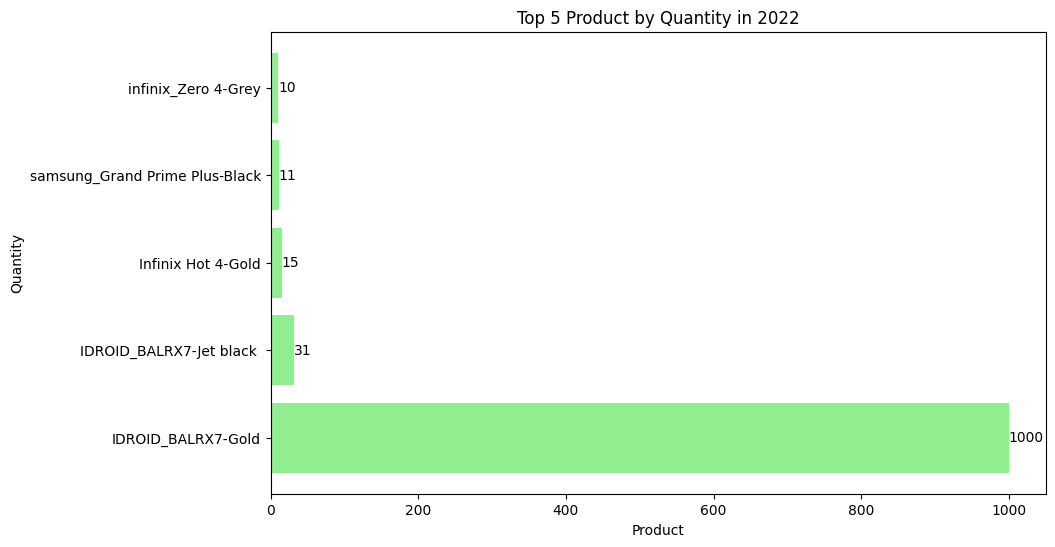

In [169]:
# Membuat grafik
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
bars = plt.barh(top_5_sku['sku_name'], top_5_sku['qty_ordered'], color='lightgreen')

for bar, qty in zip(bars, top_5_sku['qty_ordered']):
  plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(qty), ha='left', va='center', fontsize=10)

# Setting label & Title
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.title ('Top 5 Product by Quantity in 2022')
plt.show()

## `No 2`
**Dear Data Analyst**,
<br></br>
Menindaklanjuti meeting gabungan Tim Werehouse dan Tim Marketing, kami menemukan bahwa ketersediaan stock produk dengan Kategori Others pada akhir 2022 kemarin masih banyak.
1. Kami mohon bantuan untuk melakukan pengecekan data penjualan kategori tersebut dengan tahun 2021 secara kuantitas penjualan. Dugaan sementara kami, telah terjadi penurunan kuantitas penjualan pada 2022 dibandingkan 2021. (Mohon juga menampilkan data ke-15 kategori)
<br></br>
2. Apabila memang terjadi penurunan kuantitas penjualan pada kategori Others, kami mohon bantuan untuk menyediakan data TOP 20 nama produk yang mengalami penurunan paling tinggi pada 2022 jika dibanding dengan 2021. Hal ini kami gunakan sebagai bahan diskusi pada meeting selanjutnya.  

Mohon bantuan untuk mengirimkan data tersebut paling lambat 4 hari dari hari ini. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Werehouse**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data pada transaksi selama 2021
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name masing-masing tahun
5. Menggabungkan kedua data dengan merge
6. Lakukan pengurangan kolom qty 2022 dengan qty 2021


```



</details>

## `Jawaban No 2.1`

In [170]:
# Filter data for valid transactions (is_valid == 1)
df_valid = df[df['is_valid'] == 1].copy()

# Filter data for the year 2021 and 2022
df_2021 = df_valid[df_valid['order_date'].dt.year == 2021].copy()
df_2022 = df_valid[df_valid['order_date'].dt.year == 2022].copy()

# Group by category and sum the quantity ordered for each year
category_sales_2021 = df_2021.groupby('category')['qty_ordered'].sum().reset_index()
category_sales_2021.rename(columns={'qty_ordered': 'qty_2021'}, inplace=True)

category_sales_2022 = df_2022.groupby('category')['qty_ordered'].sum().reset_index()
category_sales_2022.rename(columns={'qty_ordered': 'qty_2022'}, inplace=True)

# Merge the sales data for 2021 and 2022
category_sales_comparison = pd.merge(category_sales_2021, category_sales_2022, on='category', how='outer').fillna(0)

# Calculate the difference in quantity ordered
category_sales_comparison['qty_difference_2022_vs_2021'] = category_sales_comparison['qty_2022'] - category_sales_comparison['qty_2021']

# Sort the categories by quantity difference in ascending order to see the biggest drops
category_sales_comparison_sorted = category_sales_comparison.sort_values(by='qty_difference_2022_vs_2021')

print("Perbandingan Kuantitas Penjualan per Kategori (2022 vs 2021):")
category_sales_comparison_sorted

Perbandingan Kuantitas Penjualan per Kategori (2022 vs 2021):


,category,qty_2021,qty_2022,qty_difference_2022_vs_2021
10,Others,426,263,-163
12,Soghaat,759,612,-147
8,Men Fashion,237,175,-62
1,Beauty & Grooming,168,153,-15
2,Books,171,195,24
0,Appliances,124,148,24
5,Health & Sports,173,200,27
3,Computing,109,153,44
11,School & Education,184,237,53
6,Home & Living,193,250,57


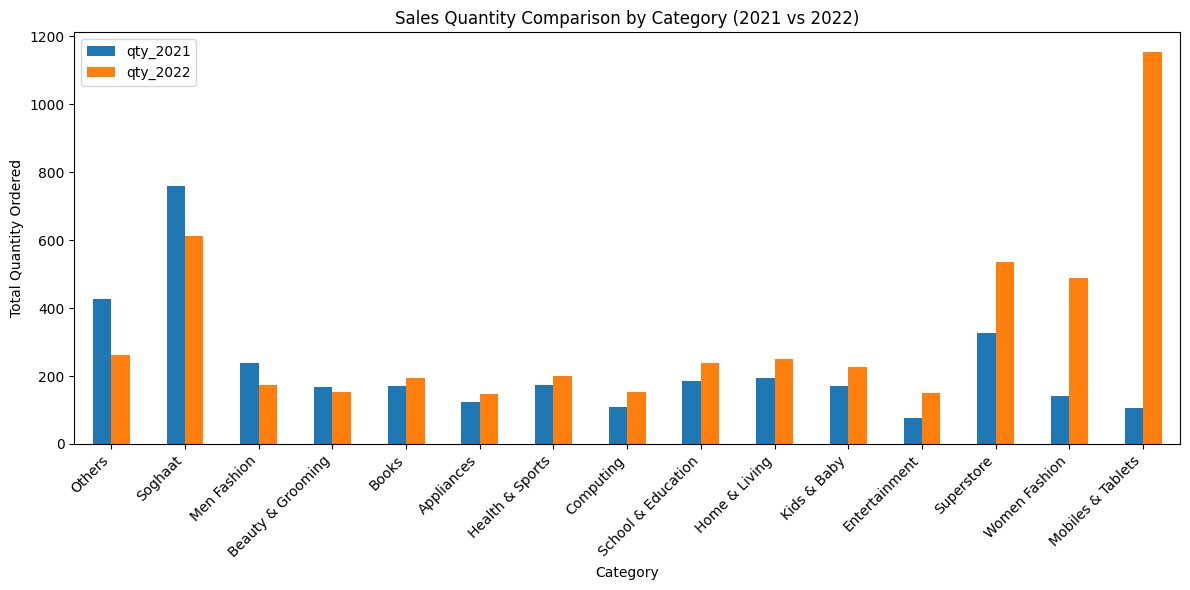

In [171]:
# Visualisai The Sales Comparison
import matplotlib.pyplot as plt

# Visualize the sales comparison
category_sales_comparison_sorted.set_index('category')[['qty_2021', 'qty_2022']].plot(kind='bar', figsize=(12, 6))
plt.title('Sales Quantity Comparison by Category (2021 vs 2022)')
plt.xlabel('Category')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## `Jawaban No 2.2`

In [172]:
# Filter data for valid transactions (is_valid == 1) and 'Others' category
df_others_valid = df[(df['is_valid'] == 1) & (df['category'] == 'Others')].copy()

# Filter data for the year 2021 and 2022
df_others_2021 = df_others_valid[df_others_valid['order_date'].dt.year == 2021].copy()
df_others_2022 = df_others_valid[df_others_valid['order_date'].dt.year == 2022].copy()

# Group by sku_name and sum the quantity ordered for each year
sku_sales_others_2021 = df_others_2021.groupby('sku_name')['qty_ordered'].sum().reset_index()
sku_sales_others_2021.rename(columns={'qty_ordered': 'qty_2021'}, inplace=True)

sku_sales_others_2022 = df_others_2022.groupby('sku_name')['qty_ordered'].sum().reset_index()
sku_sales_others_2022.rename(columns={'qty_ordered': 'qty_2022'}, inplace=True)

# Merge the sales data for 2021 and 2022
sku_sales_others_comparison = pd.merge(sku_sales_others_2021, sku_sales_others_2022,
                                       on='sku_name', how='outer').fillna(0)

# Calculate the difference in quantity ordered
sku_sales_others_comparison['qty_difference_2022_vs_2021'] = (
    sku_sales_others_comparison['qty_2022'] - sku_sales_others_comparison['qty_2021']
)

# Filter for products with a decrease in sales (difference < 0)
sku_sales_others_decrease = sku_sales_others_comparison[
    sku_sales_others_comparison['qty_difference_2022_vs_2021'] < 0
].copy()

# Sort by the magnitude of the decrease (most negative difference)
top_20_sku_decrease_others = sku_sales_others_decrease.sort_values(
    by='qty_difference_2022_vs_2021'
).head(20)

print("\nTOP 20 Produk Kategori Others dengan Penurunan Penjualan Tertinggi (2022 vs 2021):")
top_20_sku_decrease_others


TOP 20 Produk Kategori Others dengan Penurunan Penjualan Tertinggi (2022 vs 2021):


,sku_name,qty_2021,qty_2022,qty_difference_2022_vs_2021
69,RB_Dettol Germ Busting Kit-bf,200.0,45.0,-155.0
18,Dawlance_MD 10 + DWB 600,23.0,0.0,-23.0
84,Telemall_MM-DR-HB-L,23.0,2.0,-21.0
137,iu_Tickets General Enclosure-Islamabad,20.0,0.0,-20.0
70,RS_Rehmat-e-Shereen Mix Mithai,13.0,0.0,-13.0
141,kansai_NeverWet,10.0,1.0,-9.0
154,sindbad_Sindbad Gift Card-3,7.0,0.0,-7.0
133,emart_00-1,7.0,1.0,-6.0
93,Vouch 365 2016,5.0,0.0,-5.0
4,Am-PTV_ATS-004-M,5.0,0.0,-5.0


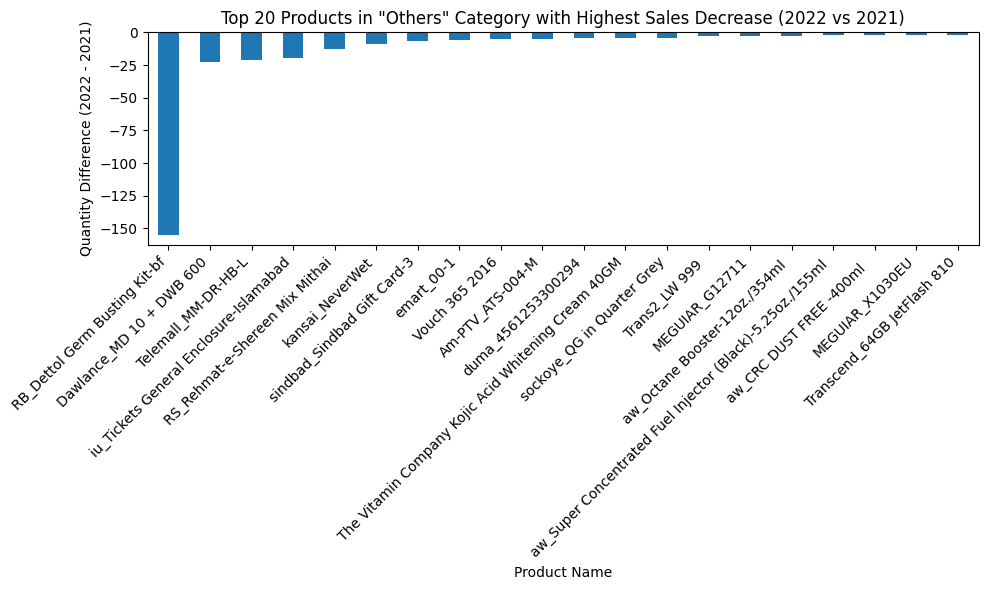

In [173]:
# Visualisasi Top 20 Prouct (2022 & 2021)
import matplotlib.pyplot as plt

# Visualize the top 20 products with the highest decrease
top_20_sku_decrease_others.set_index('sku_name')['qty_difference_2022_vs_2021'].plot(kind='bar', rot=45, figsize=(10, 6))
plt.title('Top 20 Products in "Others" Category with Highest Sales Decrease (2022 vs 2021)')
plt.xlabel('Product Name')
plt.ylabel('Quantity Difference (2022 - 2021)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## `No 3`
**Dear Data Analyst**,
<br></br>
Terkait ulang tahun perusahaan pada 2 bulan mendatang, Tim Digital Marketing akan memberikan informasi promo bagi pelanggan pada akhir bulan ini. Kriteria pelanggan yang akan kami butuhkan adalah mereka yang sudah melakukan check-out namun belum melakukan pembayaran (is_gross = 1) selama tahun 2022. Data yang kami butuhkan adalah ID Customer dan Registered Date.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Digital Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Digital Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan gross = 1
2. Memfilter data dengan valid = 0
3. Memfilter data dengan net = 0
4. Memfilter data pada transaksi selama 2022


```



</details>

## `Jawaban No 3`

In [174]:
# Filter data for transactions where is_gross is 1, is_valid is 0, and is_net is 0
df_gross_unpaid = df[(df['is_gross']==1) & (df['is_valid']==0) & (df['is_net']==0) & (df['order_date'].dt.year==2022)].copy()

# Filter data for the year 2022
df_gross_unpaid_2022 = df_gross_unpaid[df_gross_unpaid['order_date'].dt.year==2022].copy()

# Select the required columns: customer_id and registered_date
customer_data_for_promo = df_gross_unpaid_2022[['customer_id', 'registered_date']]

# Print the resulting dataframe
print(customer_data_for_promo)

     customer_id registered_date
9       C246762L      2022-05-08
18      C848774L      2021-11-07
19      C693415L      2022-04-12
21      C180595L      2022-04-22
22      C587425L      2022-03-22
...          ...             ...
5856    C394076L      2021-10-12
5859    C248585L      2022-07-10
5865    C471304L      2022-05-13
5881    C265450L      2022-02-17
5883    C676393L      2021-07-27

[1052 rows x 2 columns]


In [175]:
#Jalankan kode ini untuk mendownload file
from google.colab import files

# Simpan dataframe ke CSV
customer_data_for_promo.to_csv('audience_list.csv', encoding = 'utf-8-sig',index=False) #ganti [nama variabel file] dengan nama variabel yang digunakan
files.download('audience_list.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## `No 4`
**Dear Data Analyst**,
<br></br>
Pada bulan October hingga Desember 2022, kami melakukan campaign setiap hari Sabtu dan Minggu. Kami hendak menilai, apakah campaign tersebut cukup berdampak pada kenaikan penjualan (before_discount). Mohon bantuan untuk menampilkan data:
1. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) per bulan tersebut. Apakah ada peningkatan penjualan pada masing-masing bulan tersebut.
2. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) keseluruhan 3 bulan tersebut.

Mohon bantuan untuk mengirimkan data tersebut paling lambat minggu depan. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Campaign**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Buatlah kolom baru untuk day, month, dan month number
2. Memfilter data dengan valid = 1
3. Memfilter data dengan day termasuk 'Saturday', 'Sunday' dengan menggunakan fungsi isin dan simpan dalam variable 'weekends'
4. Memfilter data dengan day termasuk 'Monday','Tuesday','Wednesday','Thusday','Friday' dengan menggunakan fungsi isin dan simpan dengan variabel 'weekday'
5. Memfilter data pada transaksi selama 2022 bulan Oktober sampai dengan Desember
6. Gunakan groupby berdasarkan pada masing-masing variabel
7. Menggabungkan kedua data dengan merge
8. Tampilkan pada grafik batang untuk melihat perbedaananya


```



</details>

## `Jawaban No 4.1`

In [176]:
# Filter data for valid transactions (is_valid = 1)
df_valid = df[df['is_valid'] == 1].copy()

# Filter data for the months October, November, and December 2022
df_campaign_period = df_valid[
    (df_valid['order_date'].dt.year == 2022) &
    (df_valid['order_date'].dt.month.isin([10, 11, 12]))
].copy()

# Create columns for month and day of the week
df_campaign_period['month'] = df_campaign_period['order_date'].dt.strftime('%B')  # Full month name
df_campaign_period['day_of_week'] = df_campaign_period['order_date'].dt.day_name()

# Separate data into weekends and weekdays
weekends_df = df_campaign_period[df_campaign_period['day_of_week'].isin(['Saturday', 'Sunday'])].copy()
weekdays_df = df_campaign_period[df_campaign_period['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])].copy()

# Calculate daily sales for weekends and weekdays per month
weekends_sales_per_day_month = weekends_df.groupby([weekends_df['order_date'].dt.date, 'month'])['before_discount'].sum().reset_index()
weekdays_sales_per_day_month = weekdays_df.groupby([weekdays_df['order_date'].dt.date, 'month'])['before_discount'].sum().reset_index()

# Calculate average daily sales for weekends and weekdays per month
avg_weekends_sales_month = weekends_sales_per_day_month.groupby('month')['before_discount'].mean().reset_index()
avg_weekends_sales_month.rename(columns={'before_discount': 'avg_weekend_sales'}, inplace=True)

avg_weekdays_sales_month = weekdays_sales_per_day_month.groupby('month')['before_discount'].mean().reset_index()
avg_weekdays_sales_month.rename(columns={'before_discount': 'avg_weekday_sales'}, inplace=True)

# Merge the average sales data
monthly_avg_sales = pd.merge(avg_weekends_sales_month, avg_weekdays_sales_month, on='month')

# Calculate the difference and percentage change
monthly_avg_sales['sales_difference'] = monthly_avg_sales['avg_weekend_sales'] - monthly_avg_sales['avg_weekday_sales']
monthly_avg_sales['percentage_change'] = (monthly_avg_sales['avg_weekend_sales'] - monthly_avg_sales['avg_weekday_sales']) / monthly_avg_sales['avg_weekday_sales'] * 100

print("Rata-rata Harian Penjualan Weekends vs Weekdays per Bulan (Oct–Dec 2022):")
print(monthly_avg_sales)

# Check for sales increase on weekends for each month
print("\nPeningkatan Penjualan Weekends vs Weekdays per Bulan:")
for index, row in monthly_avg_sales.iterrows():
    month = row['month']
    if row['sales_difference'] > 0:
        print(f"Pada bulan {month}: Ada peningkatan penjualan di weekends sebesar {row['sales_difference']:.2f} ({row['percentage_change']:.2f}%) dibandingkan weekdays.")
    elif row['sales_difference'] < 0:
        print(f"Pada bulan {month}: Terjadi penurunan penjualan di weekends sebesar {abs(row['sales_difference']):.2f} ({row['percentage_change']:.2f}%) dibandingkan weekdays.")
    else:
        print(f"Pada bulan {month}: Tidak ada perbedaan signifikan dalam penjualan antara weekends dan weekdays.")


Rata-rata Harian Penjualan Weekends vs Weekdays per Bulan (Oct–Dec 2022):
      month  avg_weekend_sales  avg_weekday_sales  sales_difference  \
0  December       4.105994e+06          8542530.0     -4.436536e+06   
1  November       5.774045e+06          6204666.0     -4.306210e+05   
2   October       5.708341e+06          7872212.4     -2.163872e+06   

   percentage_change  
0         -51.934684  
1          -6.940277  
2         -27.487466  

Peningkatan Penjualan Weekends vs Weekdays per Bulan:
Pada bulan December: Terjadi penurunan penjualan di weekends sebesar 4436536.00 (-51.93%) dibandingkan weekdays.
Pada bulan November: Terjadi penurunan penjualan di weekends sebesar 430621.00 (-6.94%) dibandingkan weekdays.
Pada bulan October: Terjadi penurunan penjualan di weekends sebesar 2163871.73 (-27.49%) dibandingkan weekdays.


In [177]:
# Filter data for valid transactions (is_valid==1)
df_valid = df[df['is_valid'] == 1].copy()

# Filter data for the period October to December 2022
start_date = '2022-10-01'
end_date = '2022-12-31'
df_campaign = df_valid[(df_valid['order_date'] >= start_date) & (df_valid['order_date'] <= end_date)].copy()

# Display the first few rows of the filtered data
display(df_campaign.head())

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
6,ODR7610732813d,C313534L,2022-12-01,P849301,2697000,1,2697000,809100,1887900,1,1,1,1,cod,mitsubhisi_1.0 Ton - SRK-13CMK-CS,2697000,2373360,Appliances,2022-01-19
7,ODR4415476736l,C215074L,2022-12-01,P918122,2533672,1,2533672,760101,1773570,1,1,0,3,customercredit,lenovo_80HR00AKUE,2456010,2063002,Computing,2021-09-13
34,ODR3138948564v,C609754L,2022-11-06,P622378,1195902,1,1195902,174000,1021902,1,1,1,4,Payaxis,AYS_32-32G6530,1195902,1076306,Entertainment,2022-06-22
35,ODR6438394533v,C795052L,2022-11-06,P196053,918952,1,918952,174000,744952,1,1,1,4,Payaxis,Delsey_384182100,918952,698378,Home & Living,2022-05-18
36,ODR1691826218q,C118563L,2022-11-06,P748128,762062,1,762062,174000,588062,1,1,1,7,Easypay,HP_PRINTER-LJ-M102AW,762062,609638,Computing,2022-06-07


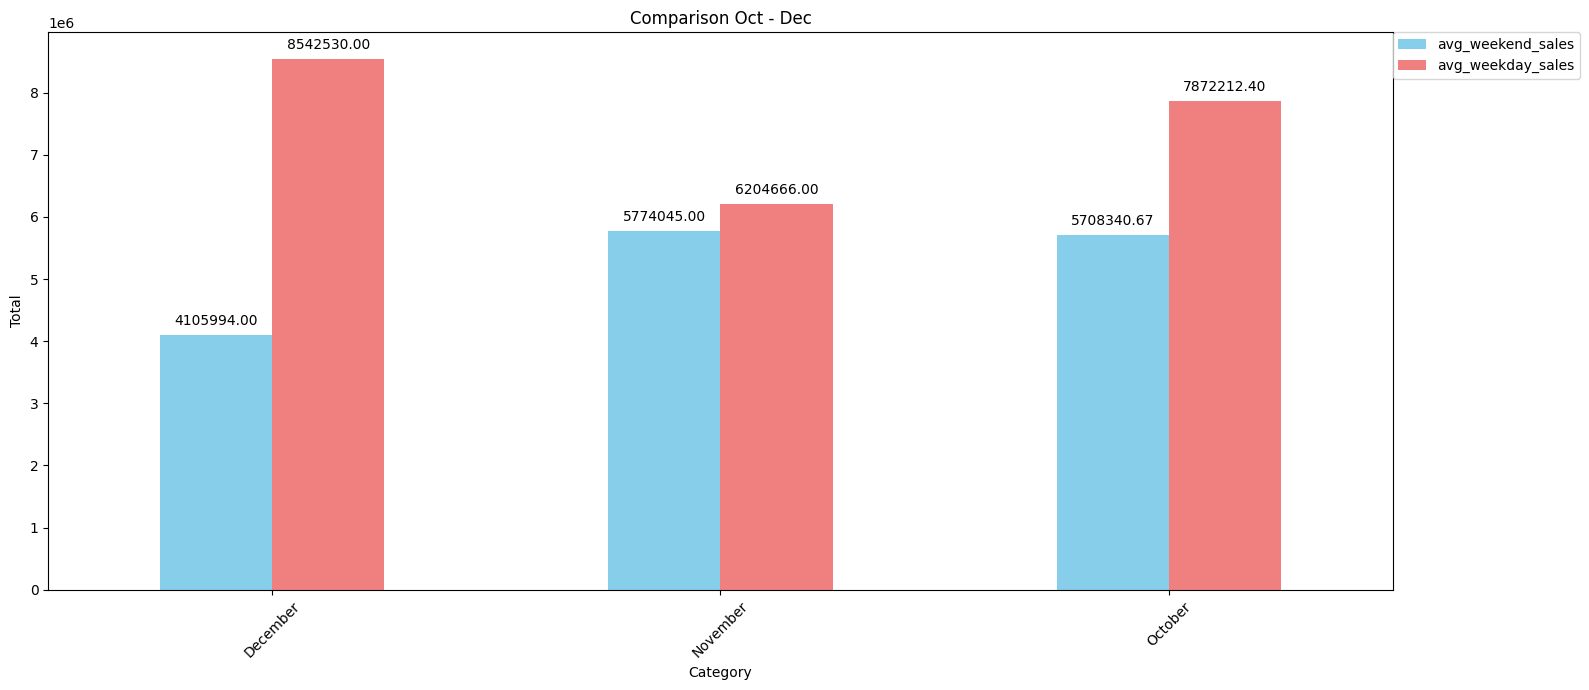

In [178]:
# Memvisualisasikan rata-rata harian penjualan weekends (Sabtu & Minggu) vs rata-rata harian penjualan weekdays (Senin - Jumat) per bulan tersebut.
import matplotlib.pyplot as plt

# Assuming 'data18' is your DataFrame
ax = monthly_avg_sales.plot(
    x='month',
    y=['avg_weekend_sales', 'avg_weekday_sales'],
    kind='bar',
    grid=False,
    xlabel='Category',
    ylabel='Total',
    figsize=(16, 7),
    rot=45,
    table=False,
    secondary_y=False,
    color=['skyblue', 'lightcoral'] # Added colors here
)

# Adding title
plt.title('Comparison Oct - Dec')

# Looping through each bar and adding value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points')

# Show the plot
# Move the legend outside the plot
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

## `Jawaban No 4.2`


Rata-rata Harian Penjualan Weekends vs Weekdays Keseluruhan 3 Bulan (Oct–Dec 2022):
Rata-rata Harian Penjualan Weekends: 5269300.00
Rata-rata Harian Penjualan Weekdays: 7520249.29
Secara keseluruhan selama 3 bulan, rata-rata penjualan harian di weekends lebih rendah dari weekdays.


/tmp/ipython-input-1764336100.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day Type', y='Average Daily Sales', data=overall_avg_data, palette=['skyblue', 'lightcoral'])


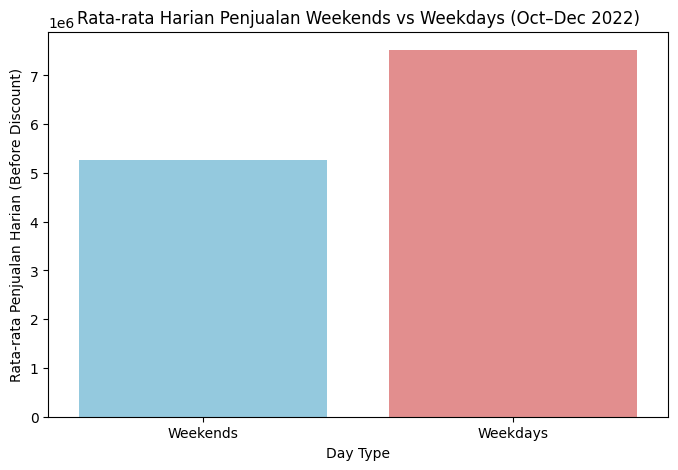

In [179]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
# Calculate the number of unique weekend days and weekday days in the campaign period
num_weekend_days = weekends_df['order_date'].dt.date.nunique()
num_weekday_days = weekdays_df['order_date'].dt.date.nunique()

# Calculate total sales for weekends and weekdays across the 3 months
total_weekend_sales = weekends_df['before_discount'].sum()
total_weekday_sales = weekdays_df['before_discount'].sum()

# Calculate overall average daily sales for weekends and weekdays
overall_avg_weekend_sales = total_weekend_sales / num_weekend_days if num_weekend_days > 0 else 0
overall_avg_weekday_sales = total_weekday_sales / num_weekday_days if num_weekday_days > 0 else 0

print("\nRata-rata Harian Penjualan Weekends vs Weekdays Keseluruhan 3 Bulan (Oct–Dec 2022):")
print(f"Rata-rata Harian Penjualan Weekends: {overall_avg_weekend_sales:.2f}")
print(f"Rata-rata Harian Penjualan Weekdays: {overall_avg_weekday_sales:.2f}")

# Compare the overall averages
if overall_avg_weekend_sales > overall_avg_weekday_sales:
    print(f"Secara keseluruhan selama 3 bulan, rata-rata penjualan harian di weekends lebih tinggi dari weekdays.")
elif overall_avg_weekend_sales < overall_avg_weekday_sales:
    print(f"Secara keseluruhan selama 3 bulan, rata-rata penjualan harian di weekends lebih rendah dari weekdays.")
else:
    print(f"Secara keseluruhan selama 3 bulan, rata-rata penjualan harian di weekends sama dengan weekdays.")

# Optional: Plotting for visualization (similar to 4.1 but for overall)
# Create a DataFrame for plotting the overall averages
overall_avg_data = pd.DataFrame({
    'Day Type': ['Weekends', 'Weekdays'],
    'Average Daily Sales': [overall_avg_weekend_sales, overall_avg_weekday_sales]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Day Type', y='Average Daily Sales', data=overall_avg_data, palette=['skyblue', 'lightcoral'])
plt.title('Rata-rata Harian Penjualan Weekends vs Weekdays (Oct–Dec 2022)')
plt.ylabel('Rata-rata Penjualan Harian (Before Discount)')
plt.show()